In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm 
import ast

C:\Users\lyon\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
animes = pd.read_csv("data.csv", sep = ";", converters={6:ast.literal_eval, 
                                                        7:ast.literal_eval,
                                                        8:ast.literal_eval,
                                                        9:ast.literal_eval,
                                                        10:ast.literal_eval})
animes = animes.drop(["Aired", "Link", "Episodes"], axis = 1)
animes = animes[animes["Rating"].notna()] #tiene al menos 1 rating
#si puede haber studios [None] , licensosrs [None], Voice actors [None]
#No puede haber genero None
contador_gen_none = 0
lista_index = []
for i in animes.Genre:
    if i == [None]:
        lista_index.append(contador_gen_none)
    contador_gen_none += 1
animes_none = animes.iloc[lista_index]
animes = animes.append(animes_none)
animes = animes.drop_duplicates(subset = ["ID"], keep = False)
animes.rename(columns={'ID': 'anime_id'}, inplace=True)
animes.to_csv('datasets_finales/animes.csv', sep = ';', index=False)
animes

,anime_id,Name,Rating,Type,Genre,Studios,Producers,Licensors,Voice_Actors
0,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"[Action, Military, Adventure, Comedy, Drama, M...",[Bones],"[Aniplex, Square Enix, Mainichi Broadcasting S...","[Funimation, Aniplex of America]","[Park, Romi, Kugimiya, Rie]"
1,9253,Steins;Gate,9.12,TV,"[Thriller, Sci-Fi]",[White Fox],"[Frontier Works, Media Factory, Movic, AT-X, K...",[Funimation],"[Miyano, Mamoru, Imai, Asami, Hanazawa, Kana, ..."
2,28977,Gintama° (Gintama Season 4),9.11,TV,"[Action, Comedy, Historical, Parody, Samurai, ...",[Bandai Namco Pictures],"[TV Tokyo, Aniplex, Dentsu]","[Funimation, Crunchyroll]","[Sugita, Tomokazu, Kugimiya, Rie, Sakaguchi, D..."
3,11061,Hunter x Hunter (2011) (Hunter x Hunter),9.11,TV,"[Action, Adventure, Fantasy, Shounen, Super Po...",[Madhouse],"[VAP, Nippon Television Network, Shueisha]",[Viz Media],"[Ise, Mariya, Han, Megumi, Sawashiro, Miyuki, ..."
4,820,Ginga Eiyuu Densetsu (Legend of the Galactic H...,9.10,OVA,"[Military, Sci-Fi, Space, Drama]","[Artland, Magic Bus]","[Kitty Films, K-Factory]",[Sentai Filmworks],"[Tomiyama, Kei, Horikawa, Ryo, Wakamoto, Norio..."
...,...,...,...,...,...,...,...,...,...
17270,4833,Esper Bishoujo Manami (Sexy Fighter Manami),4.44,OVA,[Hentai],[None],[Obtain Future],[None],[None]
17271,11141,Blue Seagull,4.26,Movie,"[Action, Hentai]",[None],[None],[None],[None]
17272,5569,Tsui no Sora,2.29,OVA,[Hentai],[None],[None],[None],[None]
17277,42848,Shikoyaka Naru Toki mo Hameru Toki mo,6.06,OVA,[Hentai],[None],[Queen Bee],[None],[None]


**Obtención de la cantidad de ocurrencias de los géneros de anime**

In [3]:
generos = {}
def genero(lista_generos):
    for i in lista_generos:
        if i in generos.keys():
            generos[i] += 1
        else:
            generos[i] = 1     
animes.Genre.apply(genero)
generos = dict(sorted(generos.items(), key=lambda x: x[1], reverse = True))
print(generos)

{'Comedy': 4471, 'Action': 3255, 'Fantasy': 2394, 'Adventure': 2251, 'Sci-Fi': 2157, 'Drama': 2018, 'Shounen': 1763, 'Romance': 1705, 'School': 1415, 'Slice of Life': 1333, 'Hentai': 1317, 'Supernatural': 1277, 'Music': 1157, 'Mecha': 935, 'Magic': 902, 'Ecchi': 727, 'Seinen': 718, 'Historical': 706, 'Kids': 698, 'Mystery': 633, 'Shoujo': 607, 'Sports': 527, 'Super Power': 515, 'Military': 502, 'Parody': 439, 'Demons': 418, 'Space': 408, 'Horror': 386, 'Harem': 384, 'Martial Arts': 331, 'Psychological': 310, 'Game': 294, 'Dementia': 292, 'Police': 209, 'Samurai': 158, 'Vampire': 132, 'Thriller': 109, 'Josei': 91, 'Shounen Ai': 89, 'Shoujo Ai': 76, 'Cars': 64, 'Yaoi': 38, 'Yuri': 32}


**Cantidad de tipos de animes**

In [4]:
animes.Type.value_counts() 

TV         3754
OVA        2973
Movie      1958
Special    1724
ONA        1027
Music       690
Name: Type, dtype: int64

**Descripción estadística de los tipos de los ratings de los animes:**

In [5]:
animes.Rating.describe()

count    12126.000000
mean         6.525107
std          0.882102
min          1.860000
25%          5.940000
50%          6.540000
75%          7.150000
max          9.220000
Name: Rating, dtype: float64

**Obtención de la cantidad de ocurrencias de los estudios de anime**

In [6]:
estudios = {}
def estudio(lista_estudios):
    for i in lista_estudios:
        if i in estudios.keys():
            estudios[i] += 1
        else:
            estudios[i] = 1    
animes.Studios.apply(estudio)
estudios = dict(sorted(estudios.items(), key=lambda x: x[1], reverse = True))
print(estudios)

{None: 3426, 'Toei Animation': 600, 'Sunrise': 460, 'Madhouse': 354, 'J.C.Staff': 341, 'Production I.G': 313, 'Studio Deen': 258, 'Studio Pierrot': 231, 'TMS Entertainment': 225, 'OLM': 204, 'A-1 Pictures': 200, 'Nippon Animation': 150, 'Xebec': 150, 'Tatsunoko Production': 138, 'Gonzo': 135, 'AIC': 133, 'Shaft': 128, 'Bones': 127, 'Kyoto Animation': 119, 'Shin-Ei Animation': 119, 'Satelight': 95, 'Silver Link.': 95, "Brain's Base": 91, 'Production Reed': 81, 'Arms': 79, 'Gainax': 76, 'Doga Kobo': 73, 'Zexcs': 73, 'feel.': 67, 'Studio 4°C': 67, 'Seven': 64, 'ufotable': 62, 'Group TAC': 59, 'DLE': 59, 'MAPPA': 54, 'LIDENFILMS': 54, 'Studio Ghibli': 52, 'Lerche': 52, 'Studio Hibari': 52, 'TNK': 52, 'P.A. Works': 51, 'Diomedea': 49, 'PoRO': 47, 'Artland': 45, 'Wit Studio': 45, 'T-Rex': 45, 'Kinema Citrus': 44, 'Gallop': 44, 'Actas': 44, 'Haoliners Animation League': 43, '8bit': 42, 'White Fox': 41, 'SynergySP': 41, 'Studio Gokumi': 40, 'Magic Bus': 39, 'SANZIGEN': 39, 'Tokyo Movie Shinsha

In [7]:
cantidad_de_estudios = -1 #se excluye el None
for key in estudios.keys():
    cantidad_de_estudios += 1
print(f"Cantidad total de estudios: {cantidad_de_estudios}")

Cantidad total de estudios: 603


**Obtención de la cantidad de ocurrencias de las productoras de anime**

In [8]:
productores = {}
def productor(lista_productores):
    for i in lista_productores:
        if i in productores.keys():
            productores[i] += 1
        else:
            productores[i] = 1    
animes.Producers.apply(productor)
productores = dict(sorted(productores.items(), key=lambda x: x[1], reverse = True))
print(productores)

{None: 4534, 'Aniplex': 463, 'TV Tokyo': 433, 'Lantis': 430, 'Bandai Visual': 392, 'Movic': 316, 'Sotsu': 288, 'Pony Canyon': 282, 'AT-X': 279, 'Dentsu': 274, 'Fuji TV': 262, 'Shueisha': 222, 'KlockWorx': 222, 'Pink Pineapple': 217, 'Kodansha': 213, 'TBS': 205, 'NHK': 196, 'Kadokawa Shoten': 194, 'Mainichi Broadcasting System': 192, 'DAX Production': 185, 'Genco': 167, 'Starchild Records': 158, 'Media Factory': 154, 'Sony Music Entertainment': 137, 'Nihon Ad Systems': 134, 'TV Asahi': 132, 'VAP': 131, 'Frontier Works': 127, 'flying DOG': 120, 'Toho': 117, 'Showgate': 115, 'Shogakukan-Shueisha Productions': 114, 'Kadokawa': 113, 'Tokyo MX': 113, 'Milky Animation Label': 112, 'Magic Capsule': 110, 'Geneon Universal Entertainment': 109, 'Shochiku': 105, 'Nippon Television Network': 104, 'Square Enix': 99, 'Half H.P Studio': 99, 'TOHO animation': 91, 'Studio Jack': 88, 'Nippon Columbia': 88, 'Warner Bros. Japan': 85, 'Good Smile Company': 82, 'Bushiroad': 80, 'Tohokushinsha Film Corporatio

In [9]:
cantidad_de_productoras = -1 #se excluye el None
for key in productores.keys():
    cantidad_de_productoras += 1
print(f"Cantidad total de productoras: {cantidad_de_productoras}")

Cantidad total de productoras: 1184


**Obtención de la cantidad de ocurrencias de las licenciadoras de anime**

In [10]:
licenciadores = {}
def licenciador(lista_licenciadores):
    for i in lista_licenciadores:
        if i in licenciadores.keys():
            licenciadores[i] += 1
        else:
            licenciadores[i] = 1    
animes.Licensors.apply(licenciador)
licenciadores = dict(sorted(licenciadores.items(), key=lambda x: x[1], reverse = True))
print(licenciadores)

{None: 8235, 'Funimation': 1095, 'Sentai Filmworks': 737, 'Discotek Media': 355, 'ADV Films': 292, 'Media Blasters': 271, 'Bandai Entertainment': 201, 'Aniplex of America': 188, 'Geneon Entertainment USA': 175, 'Viz Media': 173, 'Nozomi Entertainment': 134, 'Central Park Media': 122, 'Crunchyroll': 78, 'NYAV Post': 67, 'Manga Entertainment': 61, 'Maiden Japan': 59, 'NIS America, Inc.': 52, 'GKIDS': 44, '4Kids Entertainment': 43, 'The Pokemon Company International': 43, 'Kitty Media': 37, 'Saban Entertainment': 33, 'AnimEigo': 32, 'Ponycan USA': 28, 'SoftCel Pictures': 28, 'Urban Vision': 22, 'Bandai Visual USA': 20, 'Flatiron Film Company': 17, 'Warner Bros. Japan': 17, 'Critical Mass Video': 17, 'Walt Disney Studios': 16, 'Tokyopop': 15, 'Eleven Arts': 14, 'Nelvana': 11, 'Enoki Films': 11, 'NuTech Digital': 11, 'Sony Pictures Entertainment': 10, 'Shout! Factory': 9, 'Netflix': 9, 'Kadokawa Pictures USA': 9, 'JapanAnime': 8, 'Miramax Films': 7, 'Geneon Universal Entertainment': 7, 'Mar

In [11]:
cantidad_de_licenciadores = -1 #se excluye el None
for key in licenciadores.keys():
    cantidad_de_licenciadores += 1
print(f"Cantidad total de licenciadores: {cantidad_de_licenciadores}")

Cantidad total de licenciadores: 76


**Obtención de la cantidad de ocurrencias de los actores de voz de anime**

In [12]:
actores ={}
def actor(lista_actores):
    for i in lista_actores:
        if i in actores.keys():
            actores[i] += 1
        else:
            actores[i] = 1
animes.Voice_Actors.apply(actor)
actores= dict(sorted(actores.items(), key = lambda x: x[1], reverse = True))
print(actores)

{None: 7433, 'Hanazawa, Kana': 203, 'Fukuyama, Jun': 185, 'Kugimiya, Rie': 179, 'Sakurai, Takahiro': 175, 'Sawashiro, Miyuki': 169, 'Seki, Tomokazu': 149, 'Kaji, Yuki': 149, 'Kamiya, Hiroshi': 147, 'Hayashibara, Megumi': 145, 'Horie, Yui': 140, 'Nakamura, Yuuichi': 138, 'Noto, Mamiko': 135, 'Miyano, Mamoru': 134, 'Kawasumi, Ayako': 133, 'Hikasa, Yoko': 132, 'Namikawa, Daisuke': 131, 'Ootani, Ikue': 129, 'Ono, Daisuke': 128, 'Yamaguchi, Kappei': 125, 'Suzumura, Kenichi': 119, 'Kitamura, Eri': 113, 'Sugita, Tomokazu': 111, 'Hayami, Saori': 111, 'Kayano, Ai': 107, 'Tomatsu, Haruka': 106, 'Yuuki, Aoi': 105, 'Shimono, Hiro': 104, 'Mizuki, Nana': 102, 'Inoue, Kazuhiko': 101, 'Inoue, Marina': 101, 'Takayama, Minami': 101, 'Ishida, Akira': 100, 'Asumi, Kana': 100, 'Nozawa, Masako': 100, 'Itou, Shizuka': 98, 'Saito, Chiwa': 97, 'Matsuoka, Yoshitsugu': 97, 'Sakamoto, Maaya': 96, 'Midorikawa, Hikaru': 96, 'Morikawa, Toshiyuki': 96, 'Miki, Shinichiro': 95, 'Irino, Miyu': 94, 'Yamadera, Kouichi': 9

In [13]:
cantidad_de_actores_de_voz = -1 #se excluye el None
for key in actores.keys():
    cantidad_de_actores_de_voz += 1
print(f"Cantidad total de actores de voz: {cantidad_de_actores_de_voz}")

Cantidad total de actores de voz: 2695


### Análisis gráfico de los datos

**Ratings de anime**

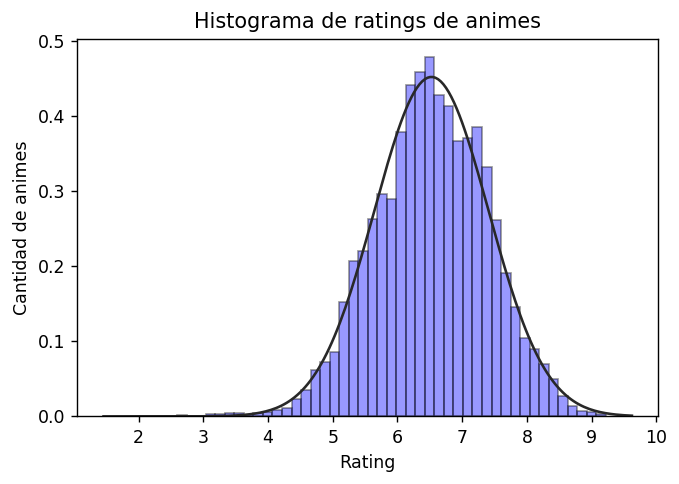

In [14]:
#generar diagramas y estadisticas de los datos
#Diagrama de ratings
fig, ax = plt.subplots()
ax = sns.distplot(animes.Rating, fit=norm, kde=False, color = 'blue', hist_kws={'edgecolor':'black'}, hist=True)
plt.title('Histograma de ratings de animes')
plt.ylabel('Cantidad de animes')
fig.set_dpi(125)
plt.show()

**Tipos de anime**

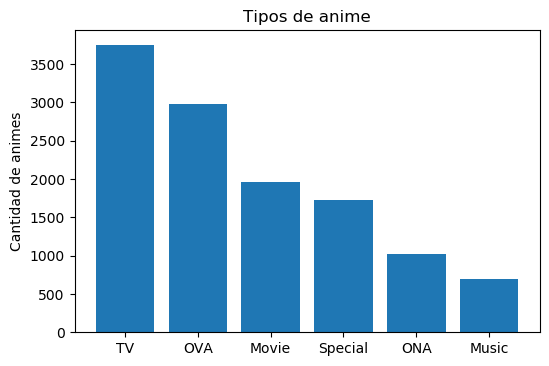

In [15]:
#Tipos de anime
tipos = animes.Type.value_counts()
fig, ax = plt.subplots()
plt.title('Tipos de anime')
plt.ylabel('Cantidad de animes')
plt.bar(tipos.index, tipos)
fig.set_dpi(100)
plt.show()

**Géneros de anime**

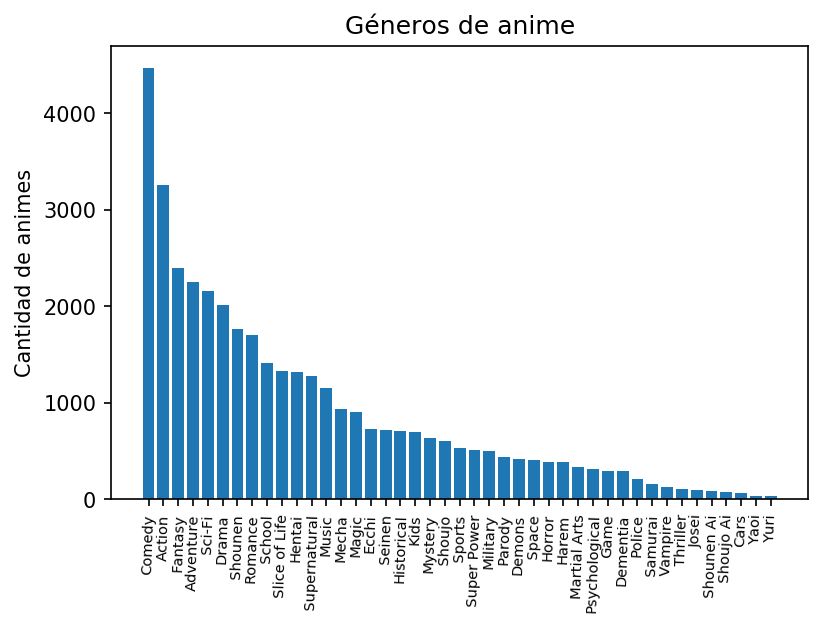

In [16]:
#Generos de anime
fig, ax = plt.subplots()
plt.bar(*zip(*generos.items()))
plt.xticks(fontsize=7, rotation=88)
plt.title('Géneros de anime')
plt.ylabel('Cantidad de animes')
fig.set_dpi(150)
plt.show()

**Principales estudios de anime**

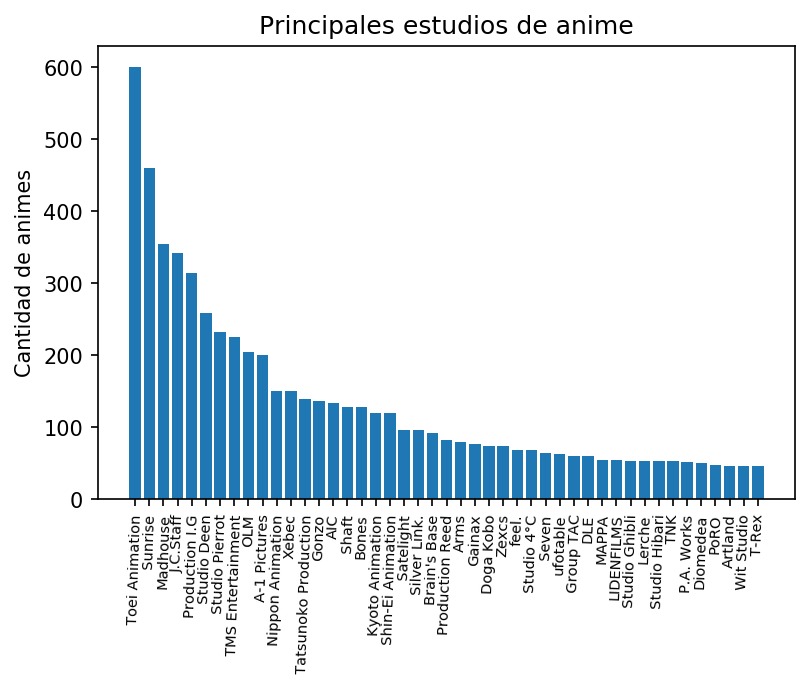

In [17]:
#Principales estudios de anime
estudios2 = {}
for (key,value) in estudios.items():
    if key == None:
        pass
    elif value >= 45:
        estudios2[key] = value
fig, ax = plt.subplots()
plt.bar(*zip(*estudios2.items()))
plt.xticks(fontsize=7, rotation=88)
plt.title('Principales estudios de anime')
plt.ylabel('Cantidad de animes')
fig.set_dpi(150)
plt.show()

**Principales productoras de anime**

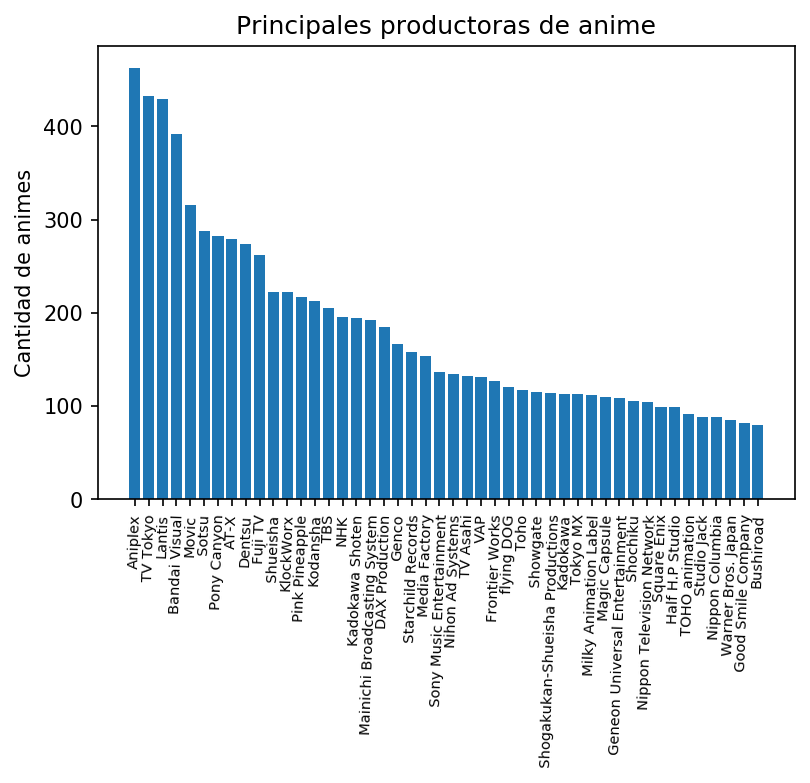

In [18]:
#Principales productoras de anime
productores2 = {}
for (key,value) in productores.items():
    if key == None:
        pass
    elif value >= 80:
        productores2[key] = value
fig, ax = plt.subplots()
plt.bar(*zip(*productores2.items()))
plt.xticks(fontsize=7, rotation=88)
plt.title('Principales productoras de anime')
plt.ylabel('Cantidad de animes')
fig.set_dpi(150)
plt.show()

**Principales actores de voz de anime**

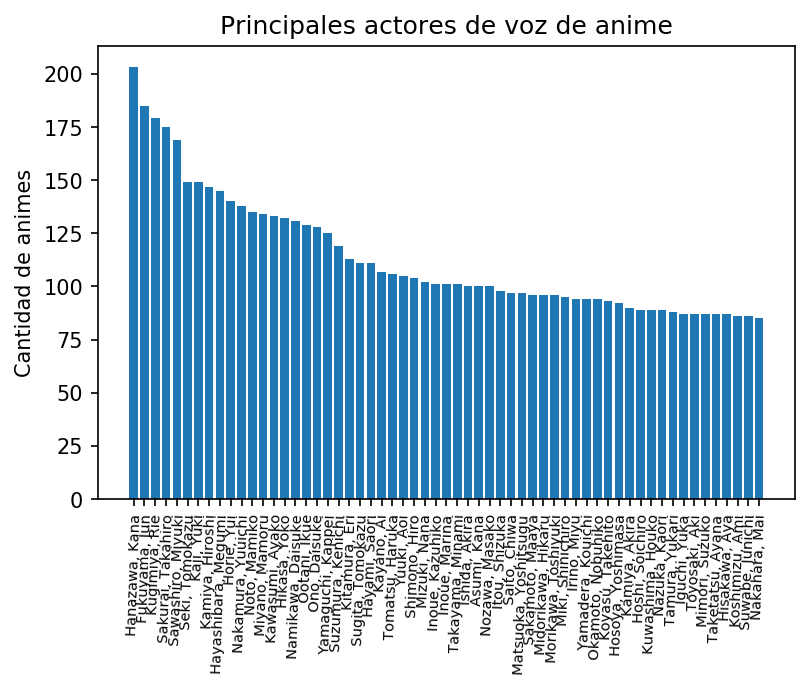

In [19]:
#Principales actores de voz de anime
actores2 = {}
for (key,value) in actores.items():
    if key == None:
        pass
    elif value >= 85:
        actores2[key] = value
fig, ax = plt.subplots()
plt.bar(*zip(*actores2.items()))
plt.xticks(fontsize=7, rotation=88)
plt.title('Principales actores de voz de anime')
plt.ylabel('Cantidad de animes')
fig.set_dpi(150)
plt.show()